# 爬虫实例：重庆（链家网）二手房信息采集与分析

### 面授班讲义  by 杨庆跃
请安装最新版本Jupyter notebook进行编程实验

博客地址 http://www.73ke.com

### 项目介绍
- 目标网址： https://cq.lianjia.com/ershoufang/
- 主要工具： requests、BeautifulSoup、Pandas、Matplotlib
- 步骤：
 - 导入必要的包
 - 分析页面
 - 数据抓取
 - 数据处理
 - 数据展现


### 1、引入包

In [4]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd

### 2、浏览网站，掌握网页结构

https://cq.lianjia.com/ershoufang/pg2  
最后的pg1到pg100是列表的页码

<!DOCTYPE html><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta http-equiv="Cache-Control" content="no-transform" /><meta http-equiv="Cache-Control" content="no-siteapp" /><meta http-equiv="Content-language" content="zh-CN" /><meta name="format-detection" content="telephone=no" /><meta name="applicable-device" content="pc"><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.lianjia.com/cq/ershoufang/pg1/" >
<meta name="mobile-agent" content="format=html5;url=https://m.lianjia.com/cq/ershoufang/pg1/"><script>
ljConf = {
    city_id: '500000',
    city_abbr: 'cq',
    city_name: '重庆',
    channel: 'ershoufang',
    page: 'ershoufang_search',
    pageConfig: {"ajaxroot":"\/\/ajax.api.lianjia.com\/","imAppid":"LIANJIA_WEB_20160624","imAppkey":"6dfdcee27d78b1107fceeca55d80b7bd"},
    feroot: '//s1.ljcdn.com/feroot/',
    ucid:'',
    cdn:'0',
};
</script>

<!-- 2017.11.8 市
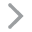
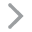

In [17]:
#设置列表页URL的固定部分
url='https://cq.lianjia.com/ershoufang/'
#设置页面的可变部分
page=('pg')

# 设置头部信息
headers = {
"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.81 Safari/537.36",
}

# 设置代理
proxies = {
  "http": "http://218.60.8.99:3129",
  "http": "http://144.76.62.29:3128",
  "http": "http://47.105.92.173:80",
  "http": "http://47.104.222.190:80",
  "http": "http://47.105.89.116"
}

html=""
for i in range(1,2): #注意，防止被封IP只采1页！！！！！！
    r= requests.get(url+page+str(i),headers=headers,proxies=proxies)
    html=html+r.text
print(html)



### 3、页面解析

先抓取四项：标题、房屋描述、总价、单价

In [71]:
#解析抓取的页面内容
soup=BeautifulSoup(html,'html.parser')
#提取房源总价
all_house_soup=soup.find('ul','sellListContent')
#print(len(all_house_soup))

In [69]:
#print(all_house_soup)
title= []
tmp = all_house_soup.find_all('div','title')
for item in tmp:
    title.append(item.a.string)

houseInfo= []
tmp = all_house_soup.find_all('div','houseInfo')
for item in tmp:
    houseInfo.append(item.text)

    
totalPrice= []
tmp = all_house_soup.find_all('div','totalPrice')
for item in tmp:
    totalPrice.append(item.text)    

unitPrice= []
tmp = all_house_soup.find_all('div','unitPrice')
for item in tmp:
    unitPrice.append(item.text)    
    
print(totalPrice)    

['148万', '126万', '248万', '160万', '295万', '265万', '130万', '115万', '220万', '240万', '265万', '178万', '80万', '130万', '70万', '215万', '132万', '190万', '81万', '119万', '110万', '71万', '260万', '172万', '220万', '350万', '420万', '232万', '117万', '170万']


#### 把各项内容合并为一个DataFrame

In [70]:
house=pd.DataFrame({'title':title,'houseInfo':houseInfo,'totalPrice':totalPrice,'unitPrice':unitPrice})
house

,title,houseInfo,totalPrice,unitPrice
0,照母山 婚房观景房 满5年唯一 税少 干湿分离 全明户型,万科城 | 2室1厅 | 85.91平米 | 西南 | 精装 | 有电梯,148万,单价17228元/平米
1,正规三房 +朝南超中庭+看房方便+诚心出售,大城小爱 | 3室2厅 | 82平米 | 南 | 简装 | 有电梯,126万,单价15366元/平米
2,江北嘴 新鸥鹏教育城 清水四房 户型方正 看中庭 安静,新鸥鹏教育城 | 4室2厅 | 128平米 | 北 | 毛坯 | 有电梯,248万,单价19375元/平米
3,万友七季城A区 3室2厅 160万,万友七季城A区 | 3室2厅 | 121.18平米 | 东南 | 简装 | 有电梯,160万,单价13204元/平米
4,清水4房2卫洋房 独立的主卧 超大横厅 很安静 业主诚心,新江与城清晖岸 | 4室2厅 | 166平米 | 东南 | 毛坯,295万,单价17772元/平米
5,板式大平层+双主卧带保姆间+全看高尔夫球场+临湖,保利高尔夫豪园 | 4室1厅 | 202.22平米 | 西 | 毛坯 | 有电梯,265万,单价13105元/平米
6,融汇巴滨路天然半岛，玫瑰公馆正规三房双卫，新房子,融汇半岛玫瑰公馆 | 3室2厅 | 102.78平米 | 东南 | 精装 | 有电梯,130万,单价12649元/平米
7,康德国会山两房 朝南山 视野开阔采光好 随时看房,康德国会山 | 2室2厅 | 70.4平米 | 东南 | 精装 | 有电梯,115万,单价16336元/平米
8,初高 标准四房 住家装修 保养好 看房方便,鲁能星城十二街区 | 4室2厅 | 129平米 | 南 | 精装 | 有电梯,220万,单价17055元/平米
9,鲁能星城四街区 前后中庭 南北通透 配套全巴蜀,鲁能星城四街区 | 3室2厅 | 127.87平米 | 南 北 | 简装 | 有电梯,240万,单价18770元/平米
